# NLP with IMDB dataset

## Load the data

In [1]:
import pandas as pd

train_df=pd.read_csv('IMDB Dataset.csv')
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
## Assess the shape of the data
print("The Shape of the Dataset".format(),train_df.shape)

The Shape of the Dataset (50000, 2)


### Importing libraries

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

### Statistical Analysis - 1

This is the start of the analysis phase where we will first check the amount of data present in either of the sentiments. We will follow this up with some pictorial representations related to the words and frequency mappings

In [5]:
good_reviews=train_df[train_df['sentiment']=='positive']['review']
bad_reviews=train_df[train_df['sentiment']=='negative']['review']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
First 10 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The

C:\Users\heath\AppData\Local\Temp\ipykernel_15652\161940613.py:3: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\heath\AppData\Local\Temp\ipykernel_15652\161940613.py:4: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Total Counts of both sets positive    25000
negative    25000
Name: sentiment, dtype: int64


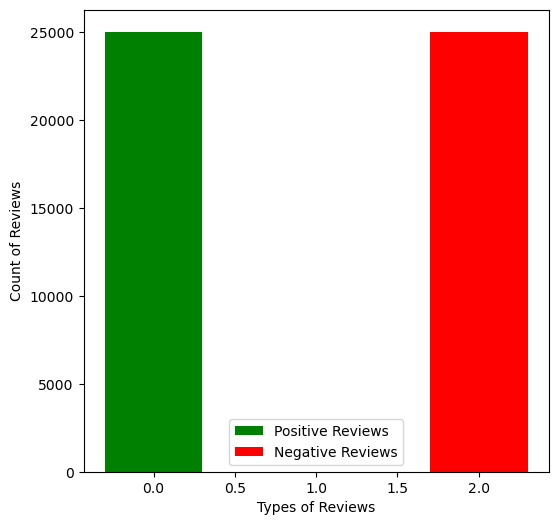

In [6]:
#Count of good and bad reviews
count=train_df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


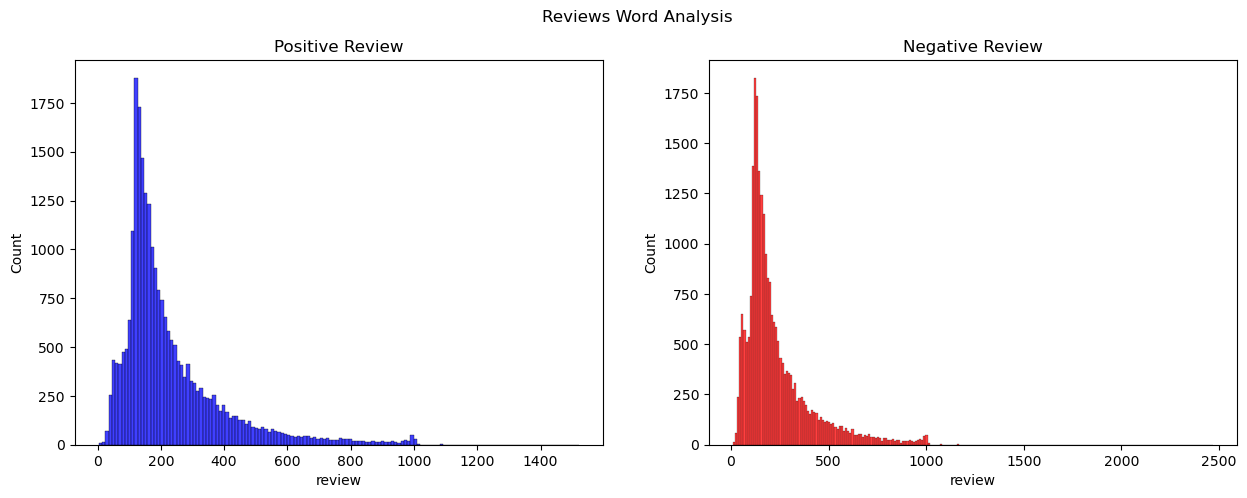

In [7]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")


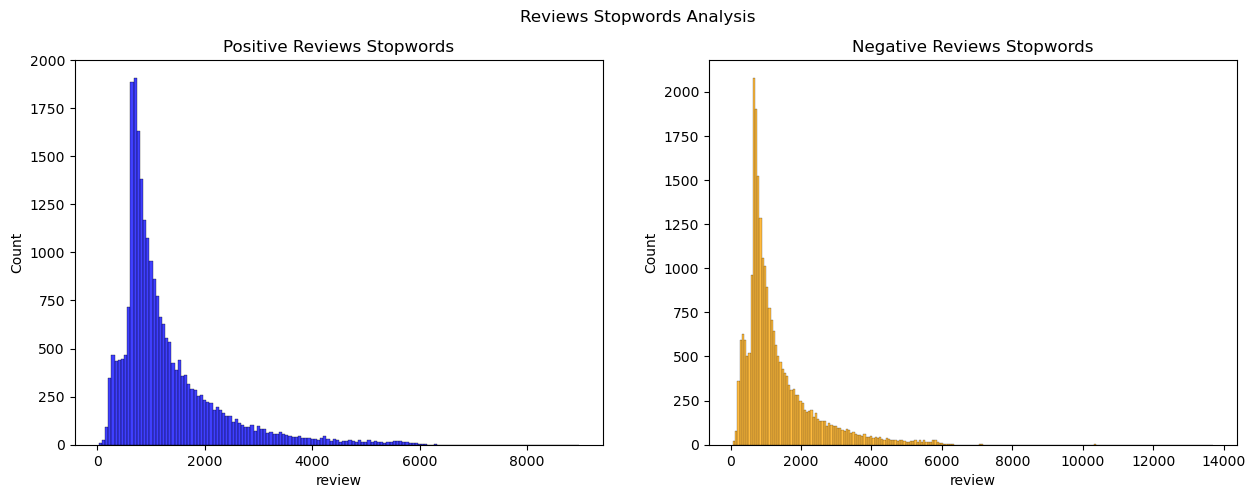

In [8]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

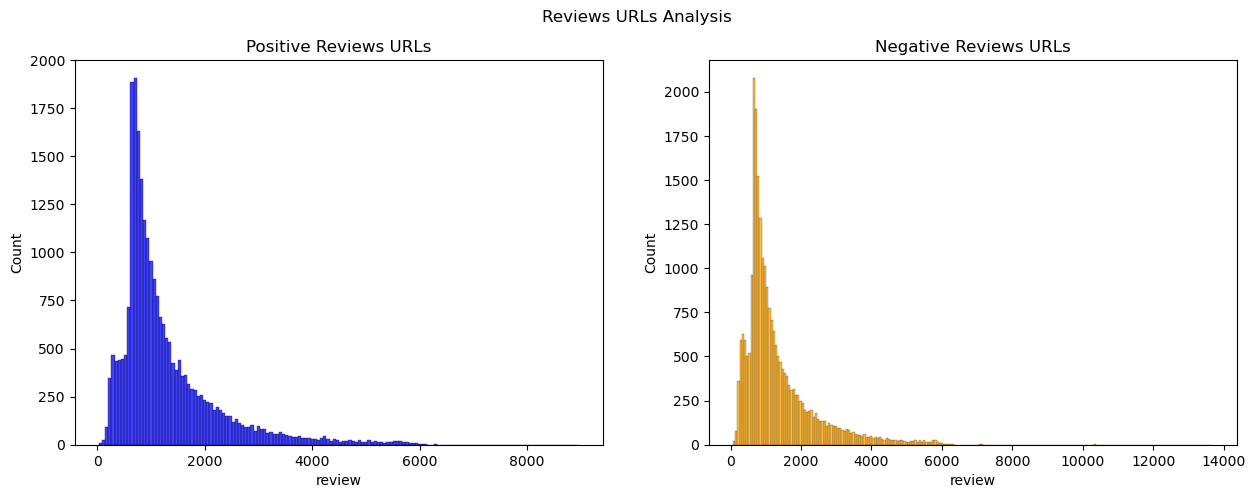

In [9]:
## Checking number of Urls
count_good_urls=count_good['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

<AxesSubplot: >

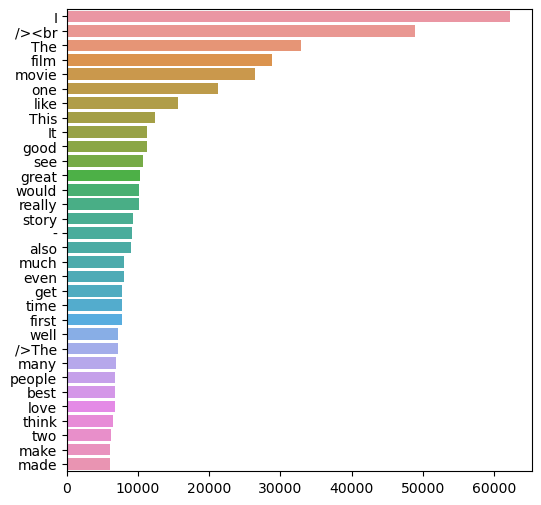

In [10]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in train_df[train_df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

### Inference From Analysis 1

The following can be inferred from the data:
- The dataset is balanced
- The dataset contains equal number of semantics of reviews of both polarity
- The dataset contains redundant words and html syntaxes
- Punctations/stopwords are present in a equal distribution in the dataset

## Statistical Analysis - 2

In this context , we will be exploring further into the analysis part. This would allow us to have a better idea which part of the data requires removal and which part can be transformed before applying any model on it.

In [11]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", 
                                          "Frequent words of negative reviews"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=count_bad['review']
train_df_ones=count_good['review']

print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Bi-gram analysis


C:\Users\heath\AppData\Local\Temp\ipykernel_15652\3632945113.py:56: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\heath\AppData\Local\Temp\ipykernel_15652\3632945113.py:59: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\heath\Anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Tri-gram analysis


C:\Users\heath\AppData\Local\Temp\ipykernel_15652\3632945113.py:64: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\heath\AppData\Local\Temp\ipykernel_15652\3632945113.py:67: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\heath\Anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [12]:
#Lets fo a Penta-Gram analysis to get an idea how the vectorization will be performed
print("Penta-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],5)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],5)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Penta-gram analysis


C:\Users\heath\AppData\Local\Temp\ipykernel_15652\2860564473.py:3: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\heath\AppData\Local\Temp\ipykernel_15652\2860564473.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\heath\Anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Inference from Analysis - 2
In this section, we have examined the position of words in a corpus, sentence, or paragraph. The analysis, especially the pentagram analysis, helps identify the sentences that occur most frequently in the corpus. These frequently occurring sentences are usually the ones selected by frequency vectorization techniques.

Therefore, this analysis gives an overview of the frequency of word combinations that occur most frequently. It is important to remove certain HTML tags and punctuation during the cleaning phase as they add noise to the review corpus.

## Cleaning the data

Prior to proceeding further, we need to sanitize the dataset by eliminating any redundancies. This involves getting rid of the following:

- HTML codes
- URLs
- Emojis
- Stopwords
- Punctuations
- Expanding Abbreviations

In [13]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

train_df['review']=train_df['review'].apply(lambda z: remove_punctuations(z))

train_df['review']=train_df['review'].apply(lambda z: remove_html(z))
train_df['review']=train_df['review'].apply(lambda z: remove_url(z))
train_df['review']=train_df['review'].apply(lambda z: remove_emoji(z))

CPU times: total: 4.02 s
Wall time: 4.25 s


In [14]:
## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data) 
    return data 

train_df['review']=train_df['review'].apply(lambda z: remove_abb(z))

In [16]:
train_df['review'][:5]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production br br The filmin...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: review, dtype: object

### The data is cleaned

In [17]:
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']

In [18]:
#Apply Gram Analysis
train_df_zero=count_bad['review']
train_df_ones=count_good['review']
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Tri-gram analysis


C:\Users\heath\AppData\Local\Temp\ipykernel_15652\3466777630.py:5: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\heath\AppData\Local\Temp\ipykernel_15652\3466777630.py:8: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\heath\Anaconda3\envs\chessEnv\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [20]:
train_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [24]:
test = train_df['review'].str.contains('worst ive seen')
test

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: review, Length: 50000, dtype: bool

In [25]:
train_df[train_df['review'].str.contains('worst ive seen')]

,review,sentiment
15264,Generally I dont do minuss and if this site co...,negative
35181,End of Days starts off pretty well Arnie plays...,negative
36272,I can admit right away that this is one of the...,negative
38341,Such a long awaited movie But it has disappoin...,negative
43215,this movie is the worst ive seen nicole kidman...,negative
